<a href="https://colab.research.google.com/github/financieras/bigdata/blob/main/videos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Analizar la ubicación de las ofertas de trabajo

In [1]:
!git clone https://github.com/financieras/bigdata.git

Cloning into 'bigdata'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 29 (delta 15), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (29/29), 245.77 KiB | 1.63 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [2]:
import pandas as pd

pth = "bigdata/dataset_reto_original.csv"
df = pd.read_csv(pth)

In [3]:
df.shape        # nos da las dimensiones de la tabla

(5423, 7)

In [4]:
df.head()       # mustra las cinco primeras filas de la tabla

,Jobtitle,City,Date,Skills,Salary,Candidates,Copy
0,desarrollador/a php-moodl,Madrid,2022-09-30,"['php', 'lms', 'moodle', 'mysql']",31500.0,7,2022-10-02
1,analista programador spark/scala,Madrid,2022-09-30,"['scala', 'spark']",31500.0,0,2022-10-02
2,desarrollador de android,Madrid,2022-10-02,['android'],no disponible,2,2022-10-02
3,administrador/a microsoft azure - remoto,Online,2022-10-02,"['hyper v', 'azure', 'itil', 'mcafee', 'o365']",31500.0,22,2022-10-02
4,hardware test engineer (automoción),Tarragona,2022-10-02,"['python', 'testing']",no disponible,2,2022-10-02


In [5]:
df['Salary'].value_counts()

Salary
no disponible        3679
31500.0               112
34500.0               111
33000.0               111
39000.0               101
                     ... 
5407.200000000001       1
5170.799999999999       1
7500.0                  1
10800.0                 1
68000.0                 1
Name: count, Length: 83, dtype: int64

In [6]:
df['Copy'].value_counts()

Copy
2022-11-27    2690
2022-11-13     395
2022-11-20     385
2022-10-16     369
2022-10-23     351
2022-10-02     326
2022-11-06     326
2022-10-30     291
2022-10-09     290
Name: count, dtype: int64

In [7]:
df['Jobtitle'].value_counts()[df['Jobtitle'].value_counts() == 9]

Jobtitle
it business analys    9
devops engi           9
frontend develop      9
Name: count, dtype: int64

In [8]:
df[df['Jobtitle'] == "analista programador xamarin for android"]

,Jobtitle,City,Date,Skills,Salary,Candidates,Copy
4228,analista programador xamarin for android,Madrid,2022-09-30,"['android', 'xamarin']",36000.0,13,2022-11-27


In [9]:
df = df.drop_duplicates(['Jobtitle', 'City', 'Skills'], keep="last")
print(len(df))
df.Copy.value_counts()

5423


Copy
2022-11-27    2690
2022-11-13     395
2022-11-20     385
2022-10-16     369
2022-10-23     351
2022-10-02     326
2022-11-06     326
2022-10-30     291
2022-10-09     290
Name: count, dtype: int64

In [10]:
pth = "bigdata/dataset_reto.csv"
df.to_csv(pth, index=False)

## Task 1.1
Crea un gráfico tipo barplot que muestre los lugares con más ofertas de trabajo.

<Axes: ylabel='City'>

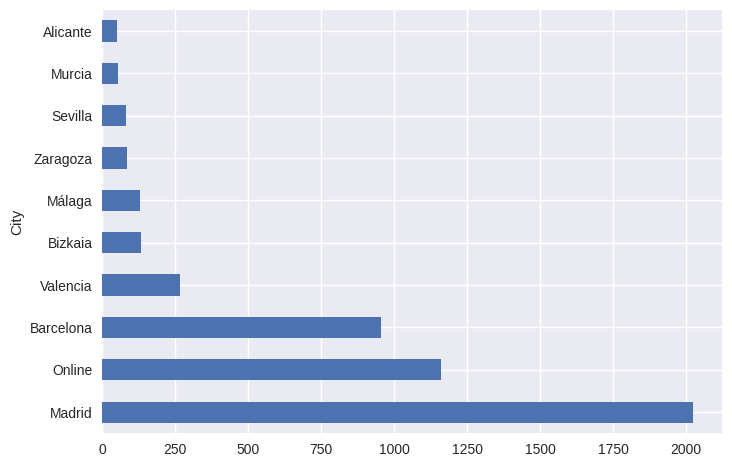

In [5]:
df["City"].value_counts()[:10].plot.barh()